# House Price Regression Analysis using Linear Regression, Random Forest and Xgboost

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

 The below code loads a CSV file, examines its structure and characteristics, and displays a sample of the data.


In [2]:
# 1-Loading data
%cd Desktop
data = pd.read_csv('kc_house_data.csv')
data.info()
data.head()

[WinError 2] The system cannot find the file specified: 'Desktop'
C:\Users\220262851\Desktop
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  z

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The code performs initial visualizations on the dataset by creating histograms to visualize the distribution of house values and selected columns. It then creates a figure with subplots and scatter plots to explore the relationships between different columns and house prices. The code also computes the correlation matrix of the dataset and creates a heatmap to visualize the correlations between variables. The resulting visualizations provide insights into the distribution of house values, the relationships between columns and house prices, and the correlations between variables in the dataset.

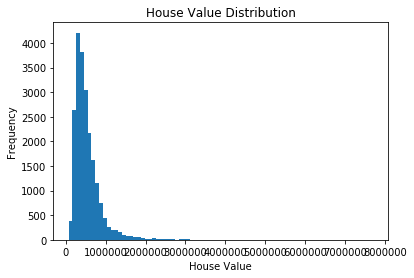

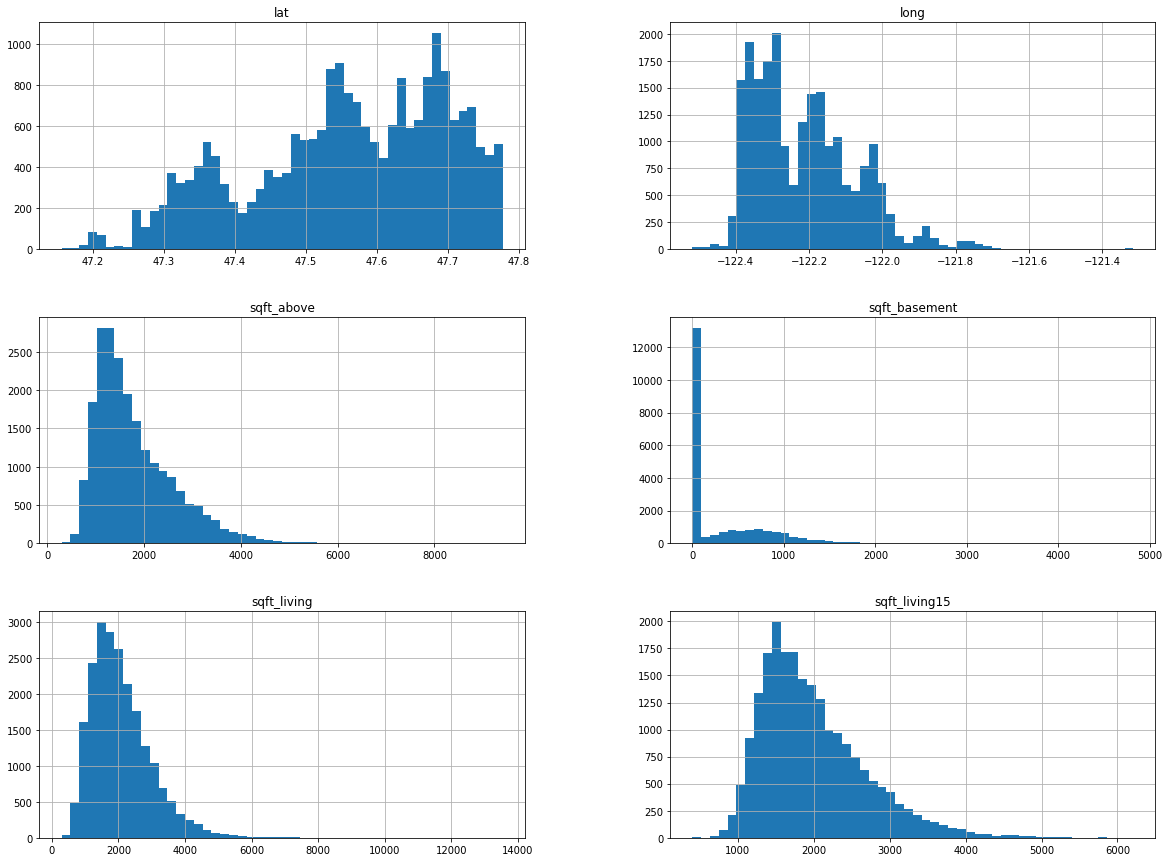

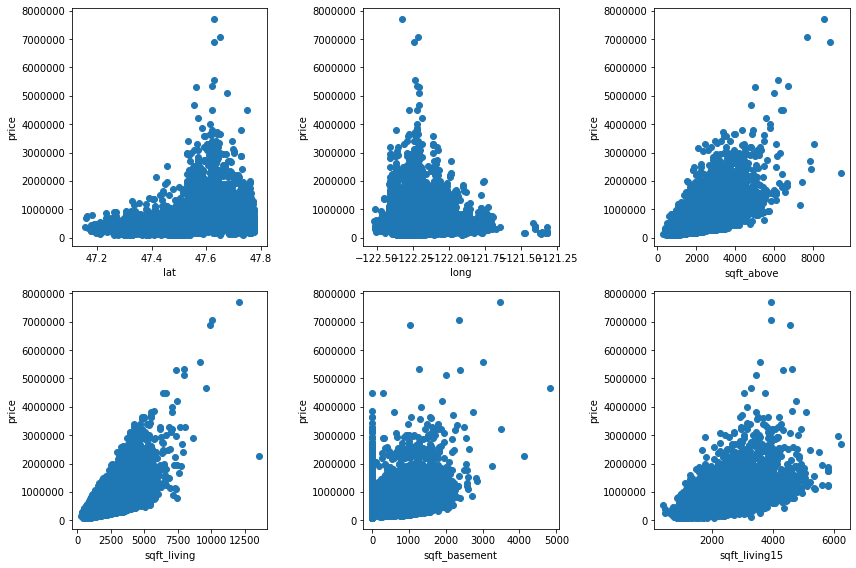

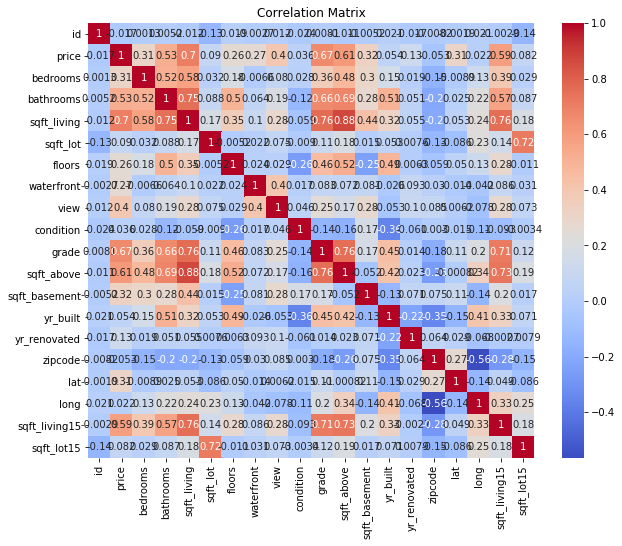

In [3]:
# 2-Initial visualisation
# Scatter plots
plt.hist(data['price'],bins=80)
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.title("House Value Distribution")

data[['lat','long','sqft_above','sqft_basement','sqft_living','sqft_living15']].hist(bins=50, figsize=(20,15))

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Scatter plots
axes[0, 0].scatter(data['lat'], data['price'])
axes[0, 0].set_xlabel('lat')
axes[0, 0].set_ylabel('price')

axes[0, 1].scatter(data['long'], data['price'])
axes[0, 1].set_xlabel('long')
axes[0, 1].set_ylabel('price')

axes[0, 2].scatter(data['sqft_above'], data['price'])
axes[0, 2].set_xlabel('sqft_above')
axes[0, 2].set_ylabel('price')

axes[1, 0].scatter(data['sqft_living'], data['price'])
axes[1, 0].set_xlabel('sqft_living')
axes[1, 0].set_ylabel('price')

axes[1, 1].scatter(data['sqft_basement'], data['price'])
axes[1, 1].set_xlabel('sqft_basement')
axes[1, 1].set_ylabel('price')

axes[1, 2].scatter(data['sqft_living15'], data['price'])
axes[1, 2].set_xlabel('sqft_living15')
axes[1, 2].set_ylabel('price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Compute correlation matrix
correlation_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In the below code section, the dataset is explored and feature engineering is performed. The code first checks for any missing values in the dataset using the isnull().sum() function. Then, new features are created by combining and dividing existing features based on specific calculations. Three new features, namely 'bath2sqftliv2', 'sqftliv2beds', and 'sqftliv2grad', are added to the dataset.

Next, certain columns are dropped from the dataset using the drop() function to remove features with high correlation (above 0.7) with each other. The dropped columns include 'bathrooms', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'sqft_living', 'id', and 'date'.

After modifying the dataset, the code computes the correlation matrix for the updated dataset. Then, a heatmap is created using the heatmap() function from the seaborn library to visualize the correlations between the remaining features. The heatmap is displayed to provide an overview of the correlations among the selected features.

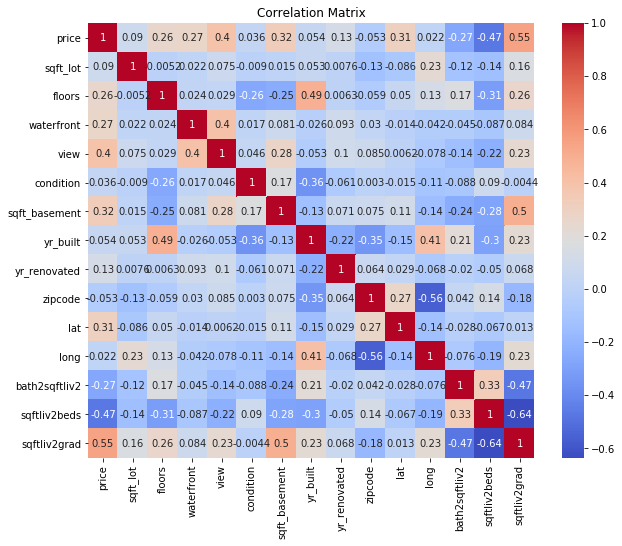

In [4]:
# 3-Data exploration and feature engineering
data.isnull().sum()
# Combine and delet features that have correlation more than 0.7
data['bath2sqftliv2'] = data['bathrooms']/data['sqft_living']
data['sqftliv2beds'] = data['bedrooms']/data['sqft_living']
data['sqftliv2grad'] = data['sqft_living']/data['grade']

data = data.drop(['bathrooms','grade','sqft_above','sqft_living15','sqft_lot15','bedrooms','sqft_living','id','date'],axis=1)
# Compute correlation matrix
correlation_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In this code section, data preparation is performed for the machine learning model. First, a copy of the dataset is created and stored in the variable X. The 'price' column is dropped from X using the drop() function, and the resulting dataset without the target variable is stored back in X.

The target variable 'price' is extracted from the original dataset and assigned to the variable y.

Next, the dataset is split into training and testing sets using the train_test_split() function from scikit-learn. The X and y datasets are passed as inputs to the function along with the random_state parameter set to 0 for reproducibility and the test_size parameter set to 0.20, indicating that 20% of the data will be used for testing and the remaining 80% will be used for training. The resulting training and testing sets are stored in X_train, X_test, y_train, and y_test, respectively.

In [5]:
# 4-Data prepration
X = data.copy()
X = X.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In this code section, models are defined using pipelines. Pipelines allow us to define a sequence of data preprocessing steps and an estimator (regressor in this case) to be applied sequentially.

First, the ColumnTransformer class from scikit-learn is used to define the preprocessing steps. In this case, the 'num' transformer is created using StandardScaler() to standardize the numerical features in X_train.columns.

Next, three models are defined: Linear Regression, Random Forest, and XGBoost. The Linear Regression model is created using the LinearRegression() class, the Random Forest model is created using the RandomForestRegressor() class with n_estimators set to 10, and the XGBoost model is created using the XGBRegressor() class.

Then, three pipelines are defined for each model. Each pipeline consists of two steps: the 'preprocessor' step that applies the preprocessing defined earlier using the ColumnTransformer, and the 'regressor' step that applies the corresponding regression model.

Finally, a dictionary called models is created, where the keys are the names of the models and the values are the corresponding pipelines. This dictionary allows convenient access to the models during the evaluation and comparison process.

In [6]:
# 5-Model definition using Pipeline

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.columns)
    ])

# Define models
linear_regression = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=10)
xgboost = XGBRegressor()

# Define pipelines
linear_regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', linear_regression)
])

random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', random_forest)
])

xgboost_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgboost)
])

# Creat the dictionary of models
models = {
    'Linear Regression': linear_regression_pipeline,
    'Random Forest': random_forest_pipeline,
    'XGBoost': xgboost_pipeline
}


In this code section, the result visualization is performed for each model in the models dictionary.

First, a subplot grid is created with 2 rows and a number of columns equal to the number of models in the models dictionary. The size of the figure is set to (20, 12) for better visualization.

Next, a loop is executed over each model in the models dictionary using the enumerate function to retrieve both the model name and the model itself. Inside the loop, the following steps are performed:

The model is fitted using the training data (X_train and y_train).
The model predicts the target variable for the test data (X_test), and the predicted values are stored in y_pred.
The R-squared score is calculated by comparing the predicted values (y_pred) with the actual values (y_test), using the r2_score function from scikit-learn. The calculated R-squared score is printed.
Two subplots are updated for each model:
The first subplot (axes[0, i]) shows a scatter plot of the actual values (y_test) versus the predicted values (y_pred). A diagonal line is added to represent a perfect prediction. The x-axis is labeled as "Actual", the y-axis is labeled as "Predicted", and the title of the subplot is set to the model name.
The second subplot (axes[1, i]) shows line plots of the first 50 samples of the actual values (y_test) and the predicted values (y_pred). The x-axis represents the sample index, and the y-axis represents the price. The title of the subplot is set to the model name, and a legend is added to distinguish between the actual and predicted values.
Finally, the layout of the subplots is adjusted using plt.tight_layout(), and the plot is displayed using plt.show(). This results in a visual representation of the predicted versus actual values for each model, allowing for comparison and evaluation of their performance.


Linear Regression - R-squared: 0.50
Random Forest - R-squared: 0.80
XGBoost - R-squared: 0.82


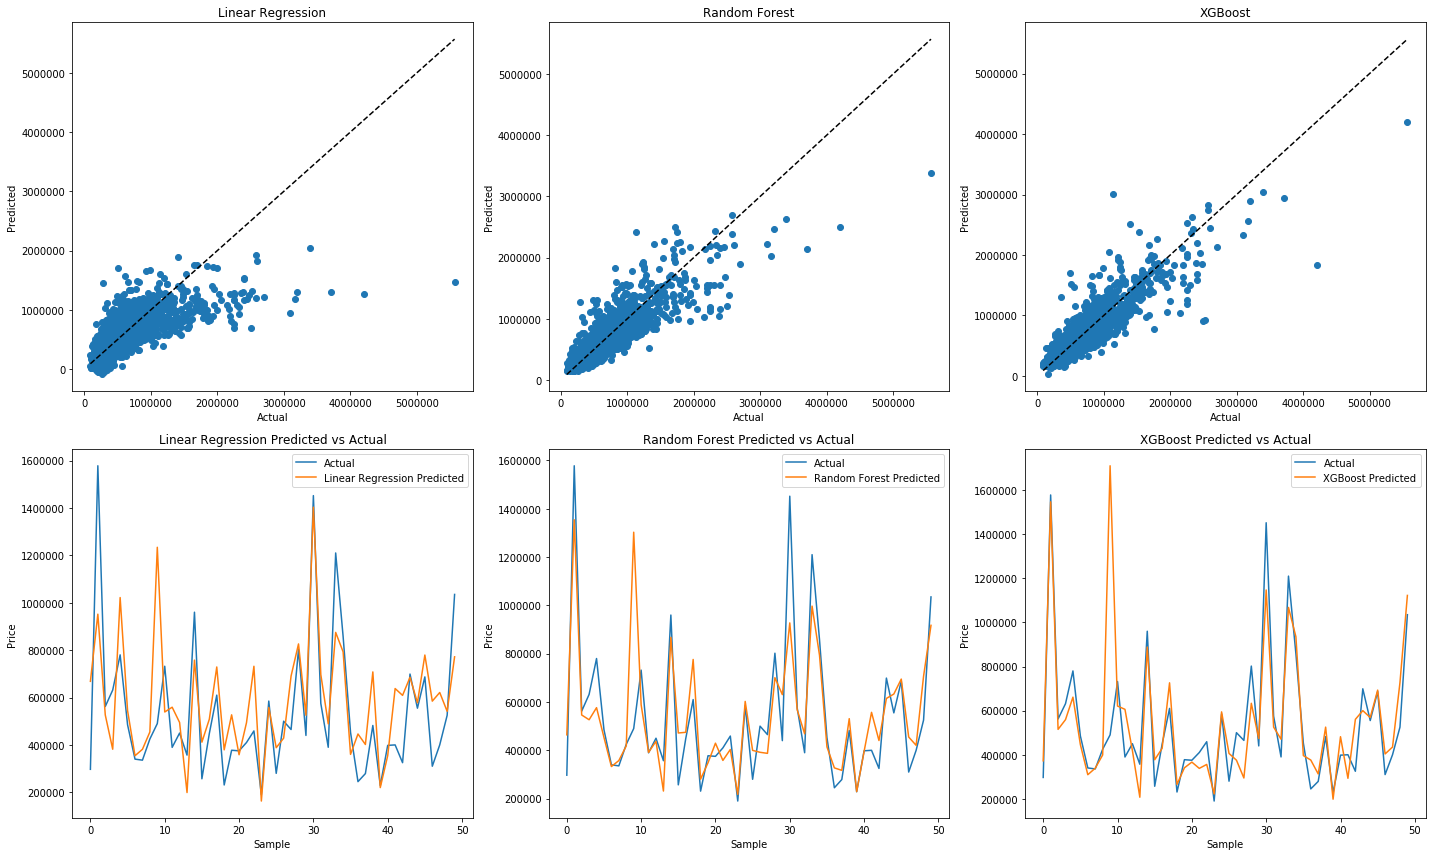

In [7]:
# 6-Result Visualisation

fig, axes = plt.subplots(2, len(models), figsize=(20, 12))

for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - R-squared: {r2:.2f}')
    
    axes[0, i].scatter(y_test, y_pred)
    axes[0, i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
    axes[0, i].set_xlabel('Actual')
    axes[0, i].set_ylabel('Predicted')
    axes[0, i].set_title(model_name)
    
    test = pd.Series(y_test[:50])
    pred = pd.Series(y_pred[:50])
    test = test.reset_index()
    test = test.drop(['index'],axis=1)
    pred = pred.reset_index()
    pred = pred.drop(['index'],axis=1)
    axes[1, i].plot(test, label='Actual')
    axes[1, i].plot(pred, label=f'{model_name} Predicted')
    axes[1, i].set_xlabel('Sample')
    axes[1, i].set_ylabel('Price')
    axes[1, i].set_title(f'{model_name} Predicted vs Actual')
    axes[1, i].legend()

plt.tight_layout()
plt.show()
